In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [27]:
import csv
import pandas as pd

DATA_FILE = '../data/09-19-Amazon-Ranking-Analysis.csv'
Amazon = pd.read_csv(DATA_FILE, encoding='latin-1')

## The objective is to first clean the dataset, and then investigate the data to answer this question: 'how does the price affect an item's rank?'. 

In [28]:
Amazon.head() 

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016/6/14,2,2,1,20.99,20.99,Supplement Warriors,Other,-1,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016/6/14,1,1,2,19.99,25.02,Sharp Nutrition,FBA,-1,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,1,1,3.96,3.96,speedy tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,2,1,1,3.96,3.96,Drug Abuse Control,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,3,1,1,3.96,3.96,Lowest Priced Tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97


In [29]:
Amazon.columns

Index(['Index', 'ProductName', 'ScrapeDate', 'ScrapedIndex',
       'ScrapedIndexTrueRank', 'CorrectedIndexTrueRank', 'ScrapedIndexPrice',
       'CorrectedPrice', 'ScrapedIndexVendor', 'ScrapedIndexVendorType',
       'BBScrapedPrice', 'BBVendorType', 'BBVendor', 'BBCorrectedPrice'],
      dtype='object')

#### The dataset contains different sources of data for 'rank', 'VendorType' and 'Price', and each of them is quite different.
#### For example:

In [30]:
Amazon['BBVendorType'].value_counts()

Amazon                                5783
O                                      715
FBA                                    470
Ships from and sold by Amazon.com.       5
Name: BBVendorType, dtype: int64

In [31]:
Amazon['ScrapedIndexVendorType'].value_counts()

Other     6367
FBA        409
Amazon     192
7.99         2
6.49         1
11.04        1
57.97        1
Name: ScrapedIndexVendorType, dtype: int64

#### In this EDA, I will only use the data from Corrected ScrapedIndex, which makes more sense to me. 

In [32]:
Amazon = Amazon.drop(['ScrapedIndex', 'ScrapedIndexTrueRank','ScrapedIndexPrice','BBCorrectedPrice', 'BBVendor', 'BBVendorType','BBScrapedPrice'], axis=1)

In [33]:
Amazon.head()

,Index,ProductName,ScrapeDate,CorrectedIndexTrueRank,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016/6/14,1,20.99,Supplement Warriors,Other
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016/6/14,2,25.02,Sharp Nutrition,FBA
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,3.96,speedy tests,Other
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,3.96,Drug Abuse Control,Other
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,3.96,Lowest Priced Tests,Other


#### Simplify the columns names

In [34]:
Amazon.columns=('Index', 'ProductName', 'ScrapeDate', 'Rank',
       'Price', 'Vendor', 'VendorType', )

In [35]:
Amazon.head()

,Index,ProductName,ScrapeDate,Rank,Price,Vendor,VendorType
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016/6/14,1,20.99,Supplement Warriors,Other
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016/6/14,2,25.02,Sharp Nutrition,FBA
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,3.96,speedy tests,Other
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,3.96,Drug Abuse Control,Other
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,3.96,Lowest Priced Tests,Other


In [36]:
Amazon.shape

(6973, 7)

#### Check the Vendor types

In [37]:
Amazon['VendorType'].value_counts()

Other     6367
FBA        409
Amazon     192
7.99         2
6.49         1
11.04        1
57.97        1
Name: VendorType, dtype: int64

#### Cleaning the Vendor types. Re-assign the numbers to 'Other' Vendor type

In [38]:
Amazon['VendorType'].replace(('7.99', '57.97','6.49', '11.04'), 'Other', inplace = True)
Amazon['VendorType'].value_counts()

Other     6372
FBA        409
Amazon     192
Name: VendorType, dtype: int64

#### Check the missing value

In [39]:
Amazon.isnull().sum()

Index          0
ProductName    0
ScrapeDate     0
Rank           0
Price          0
Vendor         0
VendorType     0
dtype: int64

#### Basic information of the price by vendor types

In [40]:
Amazon.groupby('VendorType')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
VendorType,,,,,,,,
Amazon,192.0,55.745885,89.480572,7.69,17.025,26.285,57.7500,706.11
FBA,409.0,69.176724,125.475677,9.68,18.530,26.050,57.4000,711.82
Other,6372.0,54.688732,69.346714,2.38,20.420,32.825,56.0025,931.80


#### Basic information of the rank by vendor types

In [41]:
Amazon.groupby('VendorType')['Rank'].describe()

,count,mean,std,min,25%,50%,75%,max
VendorType,,,,,,,,
Amazon,192.0,6.864583,6.690025,1.0,2.0,5.0,9.0,39.0
FBA,409.0,13.679707,10.668012,1.0,6.0,11.0,18.0,75.0
Other,6372.0,22.507847,19.531792,1.0,7.0,16.0,33.0,107.0


#### Basic informaion of the price by rank

In [42]:
Amazon.groupby('Rank')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Rank,,,,,,,,
1,343.0,70.833848,1.256090e+02,2.38,13.0350,27.290,70.4000,698.00
2,281.0,56.554235,1.050999e+02,2.50,13.6400,24.220,53.4700,706.11
3,270.0,57.366630,1.046807e+02,2.70,13.9900,25.530,49.9875,931.80
4,256.0,55.582617,9.417620e+01,2.93,13.8850,24.945,54.2100,640.83
5,250.0,49.657560,7.699055e+01,2.96,14.3900,24.970,50.8075,646.49
6,243.0,50.934650,7.703471e+01,3.15,15.7600,28.650,52.9900,655.49
7,244.0,48.970697,7.863978e+01,3.86,15.6525,25.720,48.8250,660.89
8,223.0,48.600314,7.221056e+01,4.99,16.5550,26.970,49.5650,678.00
9,216.0,50.628472,7.443531e+01,5.00,16.9900,27.270,50.2975,689.95


#### Boxplot the price by these three vendor types

C:\Users\Zongyuan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


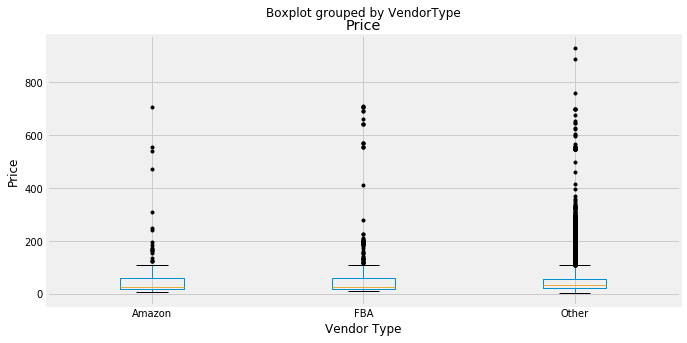

In [43]:
Amazon.boxplot(column = 'Price', by='VendorType', figsize=(11,5), sym='k.');

plt.xlabel('Vendor Type');
plt.ylabel('Price');

#### Boxplot the ranks of the product by these three vendor types. Product from Amazon rank averagely lower than other vendors.

C:\Users\Zongyuan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


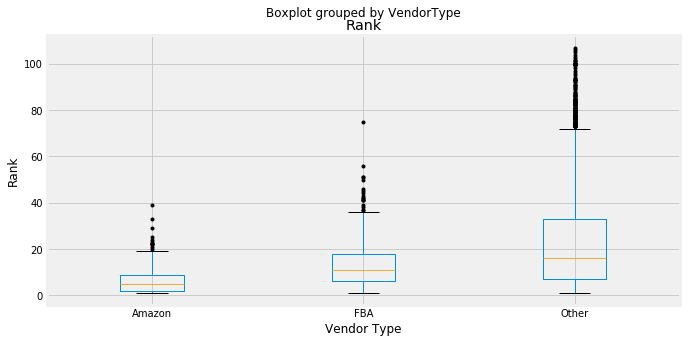

In [44]:
Amazon.boxplot(column = 'Rank', by='VendorType', figsize=(11,5), sym='k.')
plt.xlabel('Vendor Type');
plt.ylabel('Rank');

#### Histogram of the price by vendor types

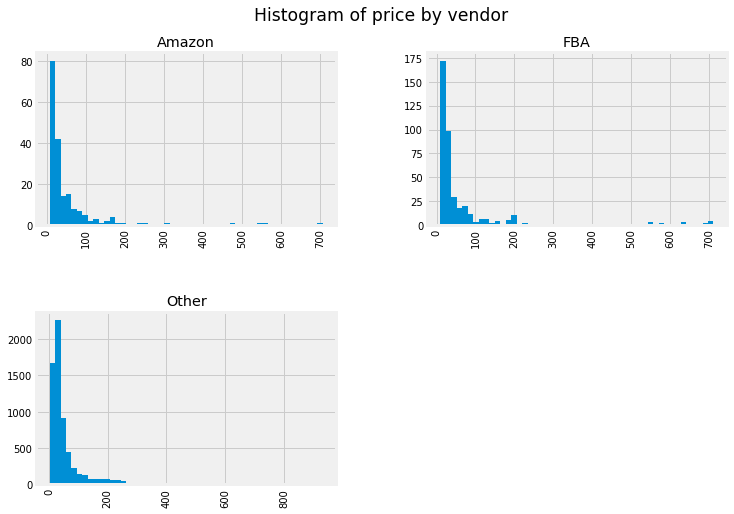

In [45]:
Amazon.hist(column='Price', by='VendorType', figsize=(12,8), bins=50);
plt.suptitle('Histogram of price by vendor', fontsize = 'xx-large');

#### If I put it in the same scale, apparently products sold by other vendors opccupy a large portion of the investigated data

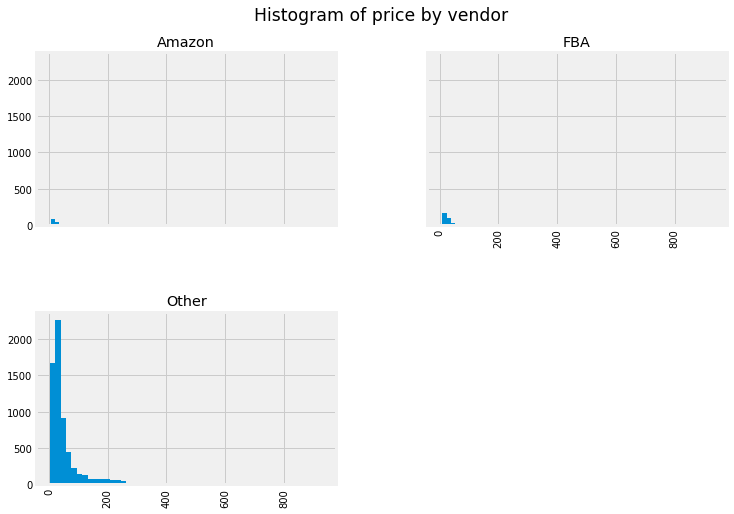

In [46]:
Amazon.hist(column='Price', by='VendorType', figsize=(12,8), bins=50, sharex=True, sharey=True);
plt.suptitle('Histogram of price by vendor', fontsize = 'xx-large');

#### Compare the rank of the product by vendor in histogram

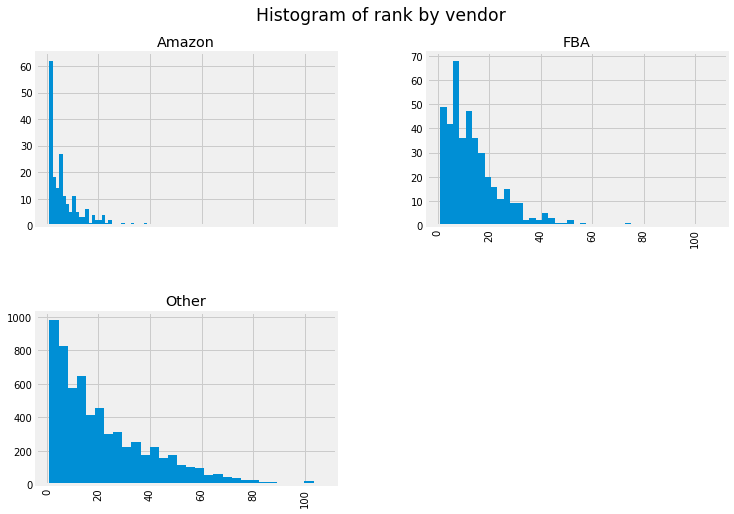

In [47]:
Amazon.hist(column='Rank', by='VendorType', figsize=(12,8),sharex=True, bins=30);
plt.suptitle('Histogram of rank by vendor', fontsize = 'xx-large');

#### Map the vendor type to numbers so that we can do the scatter plot 

In [50]:
Amazon.loc[:, 'Type_num'] = Amazon.loc[:, 'VendorType'].map({'Other':0, 'FBA':1, 'Amazon':2})
Amazon.head()

,Index,ProductName,ScrapeDate,Rank,Price,Vendor,VendorType,Type_num
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016/6/14,1,20.99,Supplement Warriors,Other,0
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016/6/14,2,25.02,Sharp Nutrition,FBA,1
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,3.96,speedy tests,Other,0
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,3.96,Drug Abuse Control,Other,0
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,3.96,Lowest Priced Tests,Other,0


#### Scatter plot the relationship of Price and Rank by Vendor types

(0, 300)

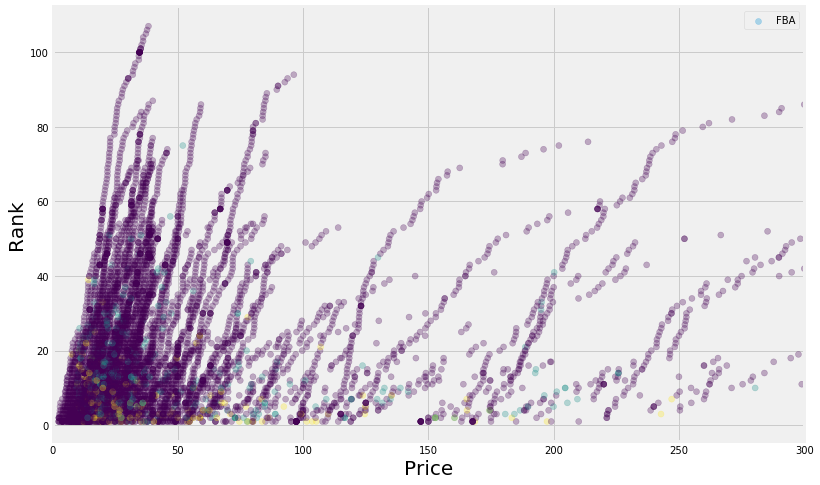

In [52]:
plt.figure(figsize=(12,8));
plt.scatter(data=Amazon, x='Price', y='Rank', c='Type_num', alpha = 0.3);
plt.xlabel('Price',fontsize=20);
plt.ylabel('Rank', fontsize=20);
plt.legend(['FBA',"Amazon", "Other"])
plt.xlim(xmin=0, xmax = 300)

### Based on the scatter plot above, I found that, for each product, it has a series of prices that has a 'linear'-like relationship to the rank of that product.

### Sample size: creat a new dataframe 'relevant' to filter the old dataframe with size of the ProductName less than a certain number

In [54]:
relevant = Amazon[Amazon.groupby('ProductName')['ProductName'].transform('size')>=20]
relevant.head()

,Index,ProductName,ScrapeDate,Rank,Price,Vendor,VendorType,Type_num
45,45,"303 (30306) Protectant Trigger Sprayer, 32 fl. Oz",2016/6/21,1,20.04,iboats,Other,0
46,46,"303 (30306) Protectant Trigger Sprayer, 32 fl. Oz",2016/6/21,2,21.98,HARVARD MARINE,Other,0
47,47,"303 (30306) Protectant Trigger Sprayer, 32 fl. Oz",2016/6/21,2,21.98,WEGOTTHEGOODS4U,Other,0
48,48,"303 (30306) Protectant Trigger Sprayer, 32 fl. Oz",2016/6/21,3,22.00,Neals Harbor,Other,0
49,49,"303 (30306) Protectant Trigger Sprayer, 32 fl. Oz",2016/6/21,4,24.10,Amazon.com,Amazon,2


In [63]:
#by doing this, only the product with at least 20 listed prices are considered for the train/test modeling
relevant['ProductName'].value_counts().head()

Fujifilm INSTAX Mini Instant Film (Rainbow)              154
Suncast GHW1732 Resin Wicker Trash Hideaway              115
Fiskars 45mm Contour Rotary Cutter (195210-1001)         106
K&N 99-5000 Aerosol Recharger Filter Care Service Kit     95
Honeywell HT-908 Turbo Force Room Air Circulator Fan      90
Name: ProductName, dtype: int64

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

### First, virsualizing the rank-price relathionship for the same product by seaborn plot
### Define a function to do this:

In [78]:
def sameproduct(name):
    df = relevant.loc[relevant['ProductName']==name, :]
    fig = sns.lmplot(x='Price', y='Rank', data= df, ci=None, line_kws={'color': 'red', 'linewidth': 2.0}, order=2);
    ax = fig.axes
    return df

### Using this function to check the rank-price relathionship product by product, and I find that linear regression is the best mode for this question

,Index,ProductName,ScrapeDate,Rank,Price,Vendor,VendorType,Type_num
6787,6787,Vortex Optics Diamondback 8x42 Roof Prism Bino...,2016/6/8,1,174.98,Hawkeye56,Other,0
6788,6788,Vortex Optics Diamondback 8x42 Roof Prism Bino...,2016/6/8,2,174.98,msarif,Other,0
6789,6789,Vortex Optics Diamondback 8x42 Roof Prism Bino...,2016/6/8,3,180.67,Teen Entrepreneur,FBA,1
6790,6790,Vortex Optics Diamondback 8x42 Roof Prism Bino...,2016/6/8,4,189.00,17th Street Photo,Other,0
6791,6791,Vortex Optics Diamondback 8x42 Roof Prism Bino...,2016/6/8,5,189.74,Active Trade,FBA,1
6792,6792,Vortex Optics Diamondback 8x42 Roof Prism Bino...,2016/6/8,6,190.98,Famous Outdoors,Other,0
6793,6793,Vortex Optics Diamondback 8x42 Roof Prism Bino...,2016/6/8,7,195.90,Mounting Solutions Plus,Other,0
6794,6794,Vortex Optics Diamondback 8x42 Roof Prism Bino...,2016/6/8,8,196.24,Savage Beagle,FBA,1
6795,6795,Vortex Optics Diamondback 8x42 Roof Prism Bino...,2016/6/8,9,201.22,Redori,FBA,1
6796,6796,Vortex Optics Diamondback 8x42 Roof Prism Bino...,2016/6/8,10,204.58,SmileysSportsShop,FBA,1


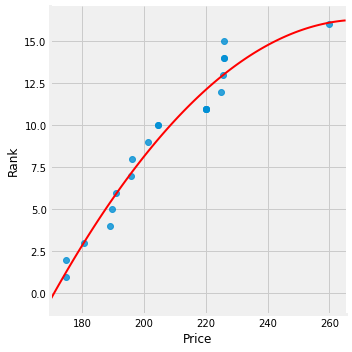

In [79]:
sameproduct('Vortex Optics Diamondback 8x42 Roof Prism Binocular')

### Define a function that use linear regression with polynomialfeatures to do this, the output will be metrics evaluation, coefficient, and fitted-plot per the input product name 

In [67]:
def train_test(name, PolyNumber):
    df = relevant.loc[relevant['ProductName']==name, :]
   
    # the featured X and y
    X = df.loc[:, ['Price']]
    y = df.loc[:, 'Rank']
    
    # use polynomialfeature here to improve the fitting
    pf = PolynomialFeatures(degree=PolyNumber, include_bias=False)
    X = pf.fit_transform(X)
    
    # also add in train-test comparison
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    
    # compare with null_rmse
    null_pred = y - np.mean(y)
    null_rmse = np.sqrt(metrics.mean_squared_error(null_pred, y))
    
    # plot the figure with seaborn
    fig = sns.lmplot(x='Price', y='Rank', data= df, ci=None, line_kws={'color': 'red', 'linewidth': 2.0}, order=PolyNumber);
    ax = fig.axes
    
    # plot the figure with fitted results, comparing with seaborn plot
    fig2 = plt.plot(df.loc[:, 'Price'], linreg.predict(X), color = 'blue', linewidth = 2.0)
    plt.legend(['from seaborn','from lr fitting', "original data"])
    return print (' rmse:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n', 'null_rmse:', null_rmse, '\n', 'coefficient:', linreg.coef_,)

### Taking a random product name from the new 'relevant' dataframe, run this function, and adjust the polynomial degree

 rmse: 3.0934331148 
 null_rmse: 47.1037735849 
 coefficient: [  3.22280245e+00   1.35752527e-05]


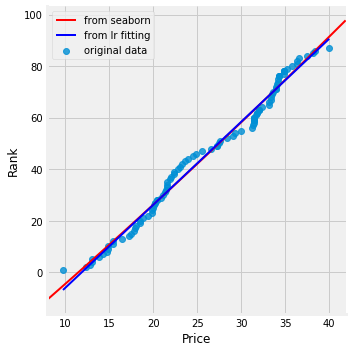

In [77]:
train_test('Fiskars 45mm Contour Rotary Cutter (195210-1001)', 2)

### rmse is reasonable compared with null_rmse. The fitting line (blue line) is also pretty good, very similar to the fitting by seaborn (red line).

### By passing through different product name values to the function, the conclusion is: for the same product, the one with higher listed price, ranks higher, which means it will be less popular among the choice of customers